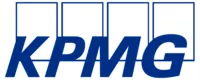

<br>

## KPMG Lighthouse - Center of Excellence around Data, AI and Emerging Technologies

*Advanced Analytics and Machine Learning  <br>
Knowledge Sharing Session - October 2022  <br>
Jorgo Haezaerts*

<br>

## **A brief introduction to explainable AI**
In this notebook, we will have a look at the well-known titanic dataset, taken from Kaggle.

First, we'll perform some basic exploratory data analysis. Then we'll go off on a tangent to Azure AutoML to train a couple of machine learning models. Next, we'll talk about why explainable AI is important and we'll introduce some fundamental algorithms. Finally, we're going to run these algorithms on our trained models and titanic dataset.

*Created by Jorgo Haezaerts*

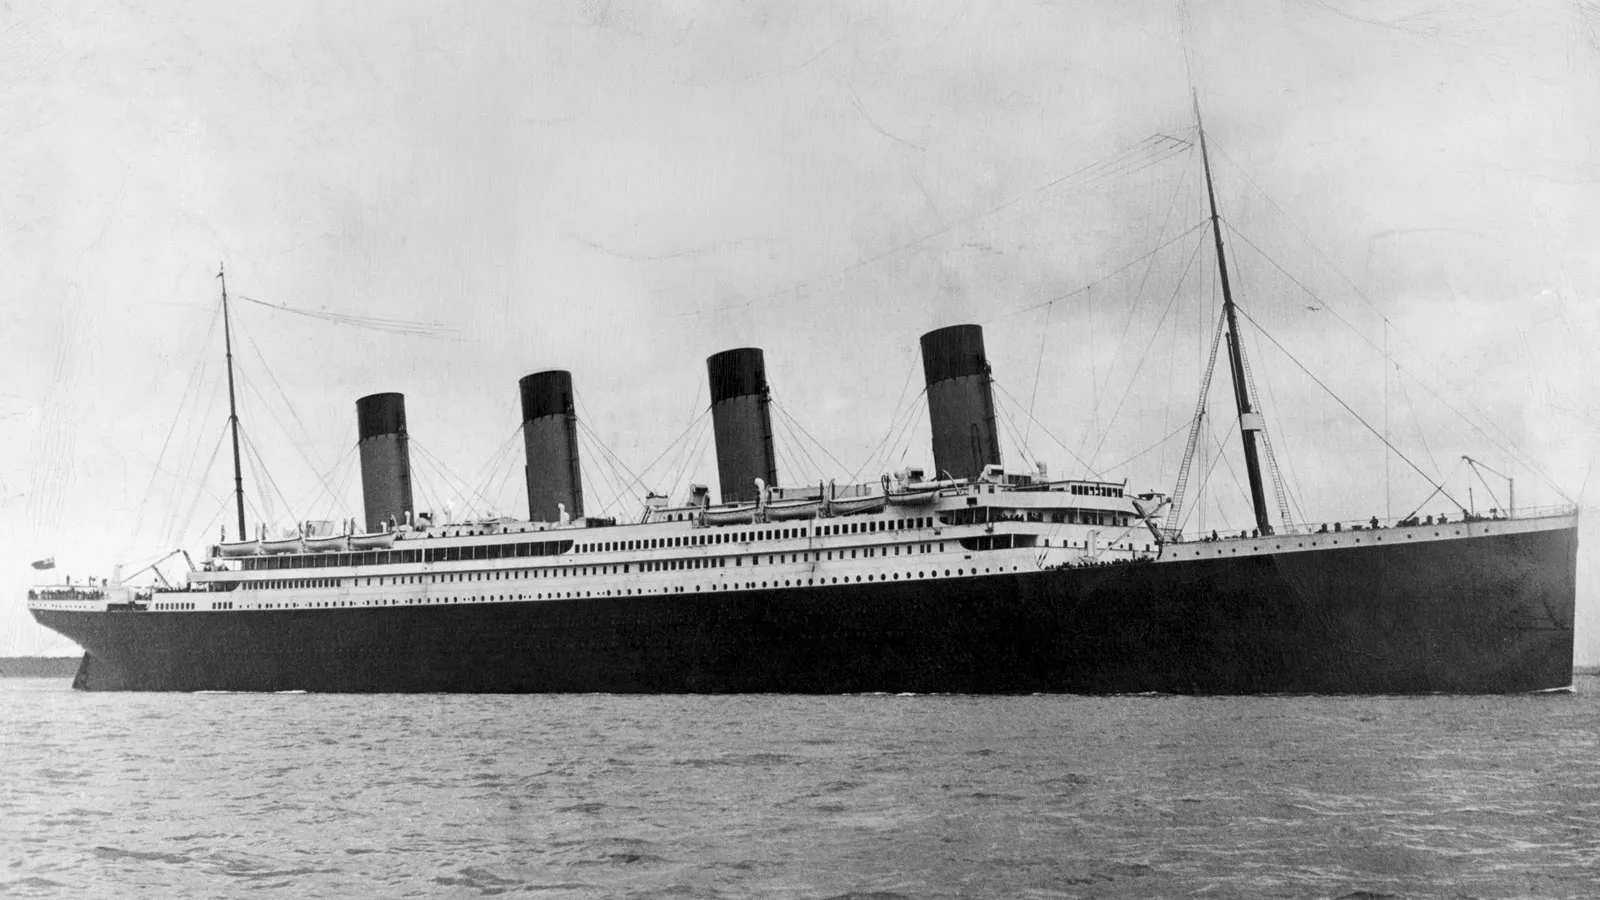

RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of a superliner or cruise ship.

In [844]:
# some conventional imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [845]:
titanic = pd.read_csv(r'/Users/jorgohaezaerts/Documents/Python Projects/interpretable ML/titanic_train.csv')

<br>

## 1. Exploratory data analysis  <br>

In [846]:
titanic.shape

(891, 12)

The titanic was boarded by a total of 2224 passengers, of which over 1500 lost their lives. This training dataset represents only a sample of all passengers.

In [847]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [848]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Note some interesting statistics. The average survival rate was 38%. Ages range from 5 months up until 80 years, with the average age being about 30. The minimum fare paid was 0, which makes sense for important passengers such as owners and engineers.

Did the oldest person on the ship survive? Heck yes!

In [849]:
titanic[titanic['Age']==80]
Algernon_Henry_Wilson_Barkworth = titanic.iloc[630,:]
Algernon_Henry_Wilson_Barkworth

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

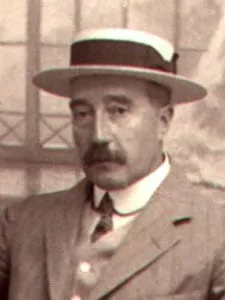

In [850]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

The table above is quite telling. Chances of survival were most favorable among women from first class and lowest among men from third class.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


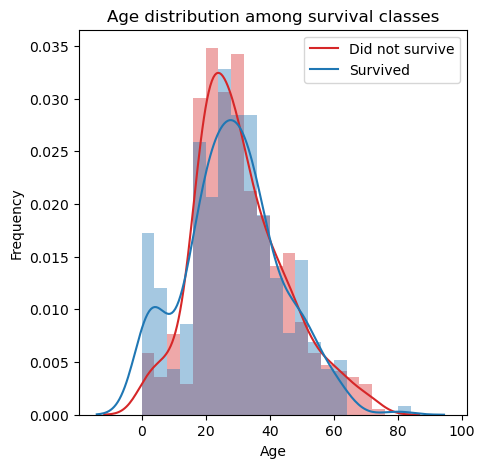

In [851]:
import matplotlib.pyplot as plt
import seaborn as sns
age_bins = np.arange(0, 100, 4)
sns.distplot(titanic.loc[(titanic['Survived']==0) & (~df['Age'].isnull()),'Age'], bins=age_bins, color='#d62728')
sns.distplot(titanic.loc[(titanic['Survived']==1) & (~df['Age'].isnull()),'Age'], bins=age_bins)
plt.title('Age distribution among survival classes')
plt.ylabel('Frequency')
plt.legend(['Did not survive', 'Survived'])
plt.show()

The light blue bars indicate that there were more survivors than deaths for a certain age, so especially babies and young children had a high likelihood of surviving.

It is now clear that the passengers of Titanic prioritised saving women and children first.

In [856]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

<br>

## 2. Preprocessing the data  <br>

In [857]:
df = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [854]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [858]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [862]:
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [863]:
num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler()),
            ])

In [864]:
cat_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder()),
            ])

In [865]:
full_pipeline = ColumnTransformer([
             ('num', num_pipeline, num_cols),
             ('cat', cat_pipeline, cat_cols),
             ])

In [866]:
X_train_transformed = full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.fit_transform(X_test)

X_train_prepared = pd.DataFrame(X_train_transformed, columns=['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])
X_test_prepared = pd.DataFrame(X_test_transformed, columns=['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [867]:
import xgboost as xgb

<br>

## 3. Training the model  <br>

In [868]:
xgb_params={
    'booster':"gbtree",
    'colsample_bytree':0.7,
    'eta':0.4,
    'gamma':0.1,
    'grow_policy':"lossguide",
    'max_bin':1023,
    'max_depth':5,
    'max_leaves':3,
    'n_estimators':600,
    'reg_alpha':2.5,
    'reg_lambda':1.9791666666666667,
    'subsample':0.6,
    'tree_method':'hist',
    'objective':'binary:logistic',
    'random_state':42
    }

dTrain = xgb.DMatrix(X_train_prepared, y_train, enable_categorical=True)
dTest = xgb.DMatrix(X_test_prepared, y_test, enable_categorical=True)
Evals=[(dTrain,"dTrain"),(dTest,"dTest")]
model = xgb.train(params=xgb_params, dtrain=dTrain, num_boost_round=2000, evals=Evals, maximize=True, verbose_eval=1000)

[15:49:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	dTrain-logloss:0.57297	dTest-logloss:0.58076
[1000]	dTrain-logloss:0.26049	dTest-logloss:0.57504
[1999]	dTrain-logloss:0.22479	dTest-logloss:0.60615


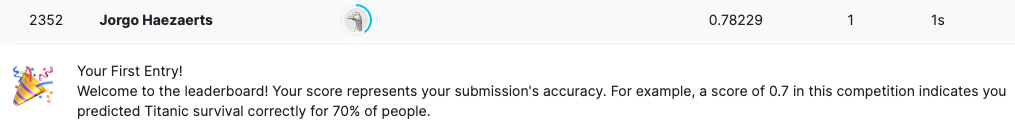

In [869]:
from IPython import display
display.Image(r'/Users/jorgohaezaerts/Desktop/score.png')

Using the XGBoost model, selected by Azure AutoML, we obtained an accuracy of 78.23%.

This score puts us on the 2342th place on the Kaggle ranking, out of 13439 submissions. So we ended top 17%, not too bad for the amount of effort we put in.

<br>

## 4.  Interpretable Machine Learning  <br>

### 4.1.   Why do we need AI to be interpretable?

- The Master Algorithm (Pedro Domingos): *society is changing, one algorithm at a time*
    - Automated decision-making
    - Even for important decisions
- ML research: increase accuracy by .01% of an already super complex model
    - now often extra element: explainability
    - understudied field of research


### 4.2.  Taxonomy

**intrinsic vs post-hoc**  <br>
Intrinsic machine learning models are intrinsically interpretable. Common examples are decision trees and sparse linear models, where you can purposely restrict the complexity of the model. Post-hoc interpretation is the application of methods to analyse the model after it has been trained. A typical example of post-hoc interpretation is permutation feature importance which is computed for tree-based models.

**model-specific vs model-agnostic**  <br>
Interpretation tools can either be model-specific or model-agnostic. An example of model-specific interpretability are the weights of a regression model. Model-agnostic interpretability methods are not allowed access to the model internals such as the weights or other parameters. These methods solely look at feature inputs and outputs. An example of a model-agnostic interpretation method are partial dependence plots (PDP).

**local vs global**  <br>
Local or global explanations are related to the scope of the explanation. A local explanation means that the interpretation method explain an individuel prediction, whereas a global interpretation method will explain the global model behaviour.

The following chapters will attempt to provide an intuition of fundamental explainable AI methods by use of images.

### 4.3. SHAP

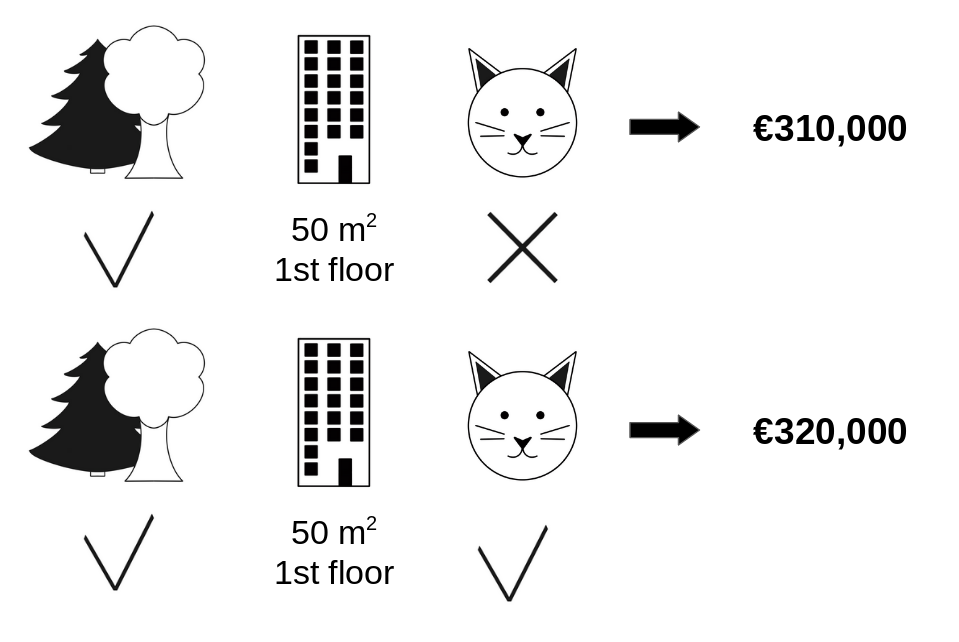

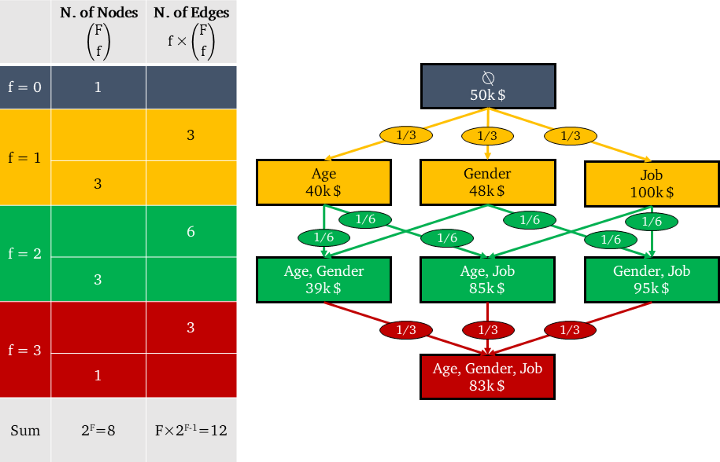

### 4.4. LIME

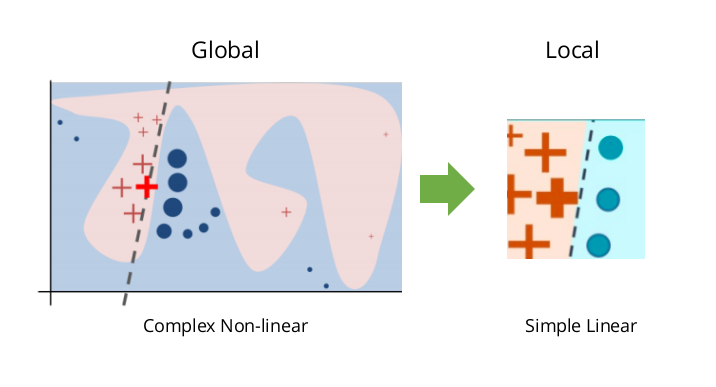

### 4.5. Counterfactual Explanations

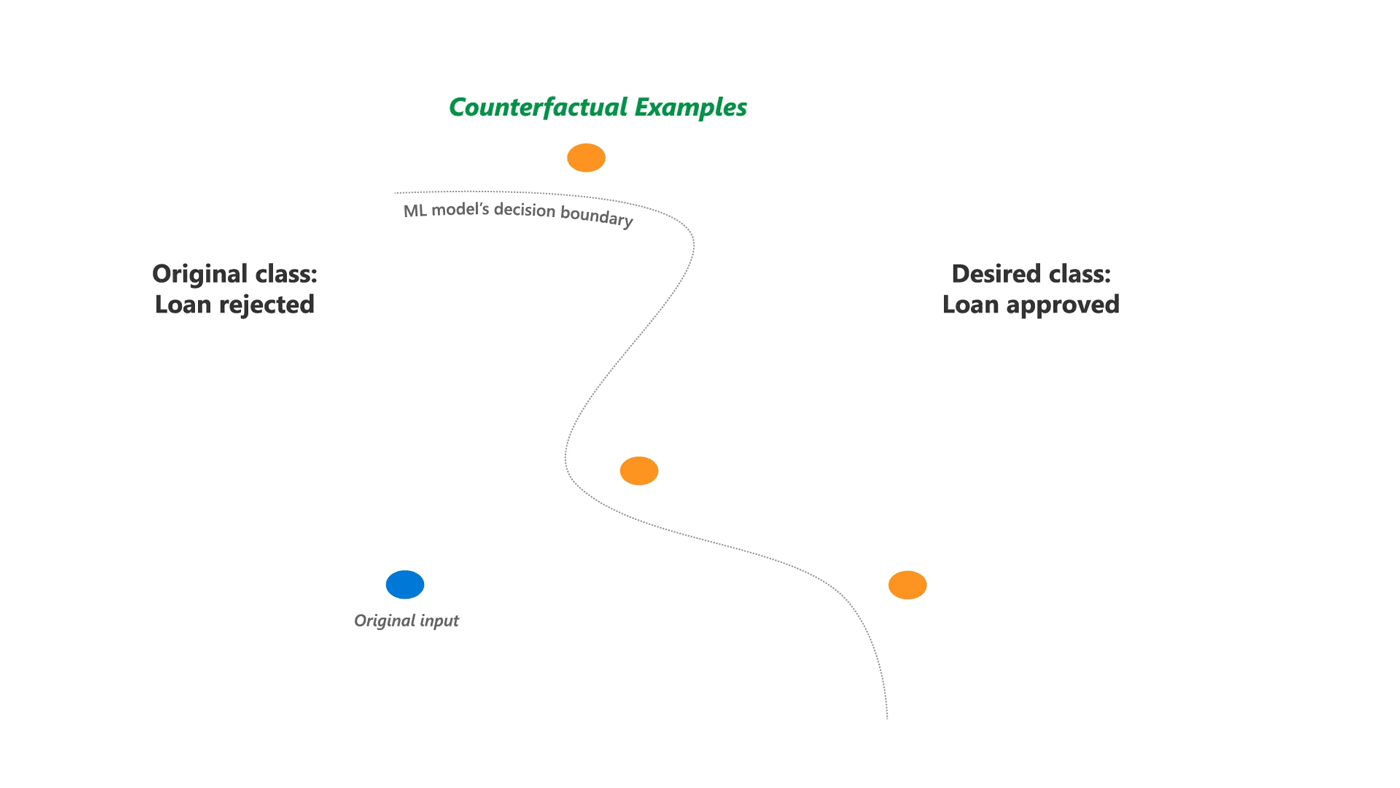

### 4.6. Applying the algorithms

#### 4.6.1. Titanic - SHAP

In [870]:
import shap

In [919]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_prepared)

In [929]:
X_train.iloc[101,:]
Roberta_Maioni = titanic.iloc[504]
Roberta_Maioni

PassengerId                      505
Survived                           1
Pclass                             1
Name           Maioni, Miss. Roberta
Sex                           female
Age                             16.0
SibSp                              0
Parch                              0
Ticket                        110152
Fare                            86.5
Cabin                            B79
Embarked                           S
Name: 504, dtype: object

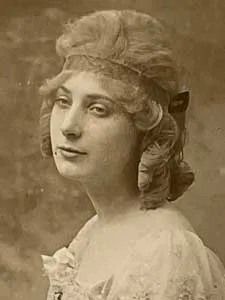

In [925]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[101,:], X_train_prepared.iloc[101,:])

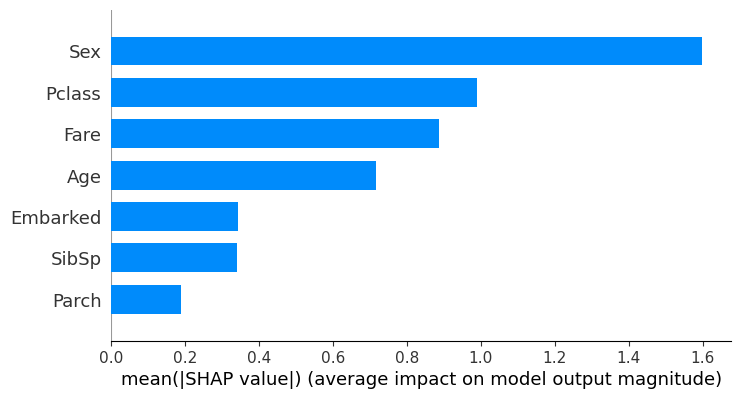

In [744]:
shap.summary_plot(shap_values, X_train_prepared, plot_type="bar")

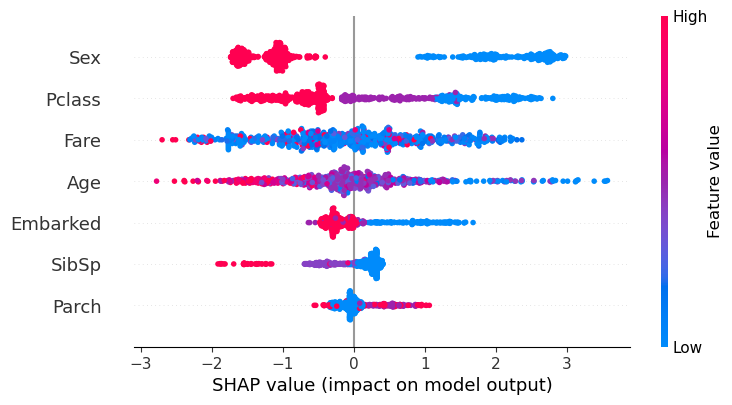

In [745]:
shap.summary_plot(shap_values, X_train_prepared)

#### 4.6.2. LIME

In [937]:
import lime
import lime.lime_tabular

In [957]:
# For LIME and Counterfactual Explanations, let's use an sk-learn based model,
# so let's quickly train a random forest.
from sklearn.ensemble import RandomForestClassifier

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
df['Age'] = knn_imputer.fit_transform(df['Age'].values.reshape(-1,1))
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df['Embarked'].values.reshape(-1,1))

X = df.drop('Survived', axis=1)
y = df['Survived']

encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

scaler=StandardScaler()
X[['Age','Fare']] = scaler.fit_transform(X[['Age','Fare']])

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [986]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train_prepared.values,
                                                   mode='classification',
                                                   feature_names=X_train_prepared.columns.tolist(), 
                                                   class_names=y_train.unique().tolist(), 
                                                   discretize_continuous=True)

In [987]:
exp = explainer.explain_instance(X_train_prepared.values[31], rf.predict_proba)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [993]:
X_train_prepared.iloc[31,:]
X_train.iloc[31,:]
William_Carbines = titanic.iloc[191,:]
William_Carbines

PassengerId                      192
Survived                           0
Pclass                             2
Name           Carbines, Mr. William
Sex                             male
Age                             19.0
SibSp                              0
Parch                              0
Ticket                         28424
Fare                            13.0
Cabin                            NaN
Embarked                           S
Name: 191, dtype: object

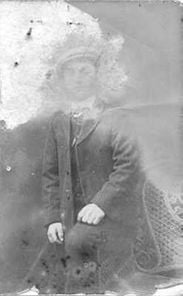

In [990]:
exp.show_in_notebook()

#### 4.5. Counterfactual Explanations

In [1005]:
import dice_ml

In [1006]:
dataframe = pd.concat([X,y], axis=1)

In [1007]:
d = dice_ml.Data(dataframe=dataframe, 
                 continuous_features=['Age', 'Fare'],
                 outcome_name='Survived')

m = dice_ml.Model(model=rf, backend="sklearn")

explainer = dice_ml.Dice(d, m, method="random")

In [1009]:
William_Henry_Allen = titanic.iloc[4,:]
William_Henry_Allen

PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                35.0
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object

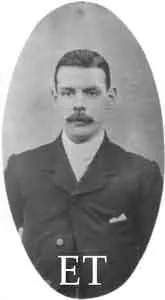

In [1028]:
e1 = explainer.generate_counterfactuals(X[4:5], 
                                        total_CFs=3, 
                                        desired_class="opposite")
                                        # features_to_vary=['Pclass','Fare','Embarked'])

e1.visualize_as_dataframe(show_only_changes=True)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.33it/s]

Query instance (original outcome : 0)


Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Survived
0       3    1  0.407926      0      0 -0.486337         2         0


Diverse Counterfactual set (new outcome: 1.0)


Pclass Sex   Age SibSp Parch        Fare Embarked Survived
0      -   0  -2.2     -     -           -        -        1
1      -   0  -1.9     -     -           -        -        1
2      -   0     -     -     -  3.15445187        -        1

Our first counterfactual states that William would have survived if he was a 14 year old female.

Unfortunately, the algorithm couldn't find any counterfactuals with features that are more reasonable to change.

In [1011]:
Edward_Scott_Robert = titanic.iloc[779,:]
Edward_Scott_Robert

PassengerId                                                  780
Survived                                                       1
Pclass                                                         1
Name           Robert, Mrs. Edward Scott (Elisabeth Walton Mc...
Sex                                                       female
Age                                                         43.0
SibSp                                                          0
Parch                                                          1
Ticket                                                     24160
Fare                                                    211.3375
Cabin                                                         B3
Embarked                                                       S
Name: 779, dtype: object

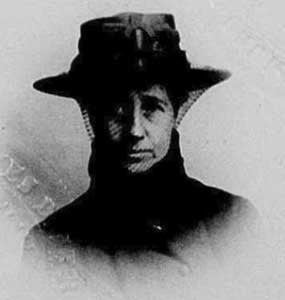

In [1018]:
e1 = explainer.generate_counterfactuals(X[779:780], 
                                        total_CFs=3, 
                                        desired_class="opposite",
                                        features_to_vary=['Pclass','Fare','Embarked'])

e1.visualize_as_dataframe(show_only_changes=True)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]

Query instance (original outcome : 1)


Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Survived
0       1    0  1.023561      0      1  3.606793         2         1


Diverse Counterfactual set (new outcome: 0.0)


Pclass Sex                Age SibSp Parch         Fare Embarked Survived
0      3   -  2.023560765744213     -     -   -0.5677511        -        0
1      3   -  2.023560765744213     -     -  -0.33909776        -        0
2      3   -  2.023560765744213     -     -  -0.59519467        -        0

The first counterfactual here states that in order for Mrs Edward Scott Robert to have died, she should have bought a third class ticket,paying a fare of about 4 dollars.

It also requires a change of age to 56 years old, but this is a bug as age is not listed in the features_to_vary parameter.

## sources

https://www.encyclopedia-titanica.org/

https://en.wikipedia.org/wiki/Titanic

https://christophm.github.io/interpretable-ml-book/